In [55]:
#Auteur Khéo
import pandas as pd 
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv('total.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7776
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   7769 non-null   object 
 1   titre                  7777 non-null   object 
 2   budget                 7777 non-null   int64  
 3   recette                7777 non-null   int64  
 4   duree                  7777 non-null   int64  
 5   genres                 7777 non-null   object 
 6   synopsis               7754 non-null   object 
 7   tagline                6457 non-null   object 
 8   realisateur            7777 non-null   object 
 9   casting                7777 non-null   object 
 10  compagnies_production  7777 non-null   object 
 11  suite                  7777 non-null   int64  
 12  production_countries   7777 non-null   object 
 13  langues                7777 non-null   object 
 14  imdb_id                7745 non-null   object 
 15  vote

float64


[Text(0, 0, '1900-1970'),
 Text(1, 0, '1970-1990'),
 Text(2, 0, '1990-2000'),
 Text(3, 0, '2000-2010'),
 Text(4, 0, '2010-2015'),
 Text(5, 0, '2015-2022')]

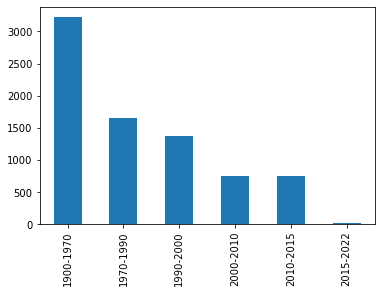

<Figure size 1440x1440 with 0 Axes>

In [70]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df.date.dt.year

#On trie par intervalle de temps
figure, ax = plt.subplots(1,1)
figure = plt.figure(figsize=(20,20))
df['periode'] = np.digitize(df['year'], [1970, 1990, 2000, 2010, 2015], right=True) + 1
df['periode'].value_counts().plot(kind = 'bar', ax=ax)
ax.set_xticklabels( ('1900-1970', '1970-1990','1990-2000', '2000-2010', '2010-2015', '2015-2022') )

<AxesSubplot:>

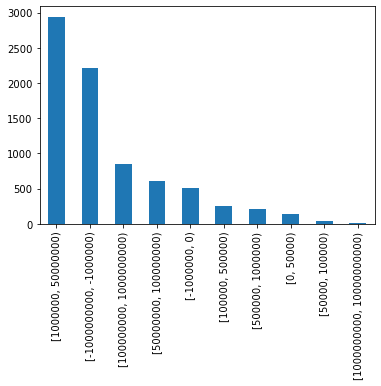

In [108]:
#Compter l'ensemble des films qui sont rentables

df['benef'] = df['recette'] - df['budget']

"""figure, ax = plt.subplots(1,1)
figure = plt.figure(figsize=(20,20))

df['tranche_benef'] = np.digitize(df['benef'], [-1000000,0,50000, 100000, 500000, 1000000], right=True) + 1
df['benef'].value_counts().plot(kind = 'bar', ax=ax)
ax.set_xticklabels( ('-1000000','-1000000 - 0', '0-50000', '50000-100000','100000-500000', '500000-1000000', '+1000000') )"""
#df['benef'].hist(bins=[-1000000,0,50000, 100000, 500000, 1000000])

bin_range = [-1000000000,-1000000,0,50000, 100000, 500000,1000000, 50000000, 100000000, 1000000000, 10000000000]
out, bins  = pd.cut(df['benef'], bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.bar()


In [87]:
df2 = df['recette'] - df['budget'] >0
df2.value_counts()

True     5011
False    2766
dtype: int64